# 粒子群算法 PSO

## 模型

$$
v_{id}^{(k+1)} = w \cdot v_{id}^{(k)} + c_{1} \cdot rand() \cdot (p_{id_best} - x_{id}^{(k)}) + c_{2} \cdot rand() \cdot (p_{gb_best} - x_{id}^{k}) 
$$

$$
x_{id}^{(k+1)} = x_{id}^{(k)} + v_{id}^{(k)} \cdot 1
$$

超参数

- 惯性系数 $w$: 个体速度受上一刻速度的影响

- 个体加速因子 $c_{1}$: 个体受个体历史最优位置的吸引

- 群体加速因子 $c_{2}$: 个体受群体历史最优位置的吸引

## 实现

In [135]:
import numpy as np

data = np.array([
    (3, 4),
    (7, 9),
    (8, 10),
    (-2, 6),
    (-4, -9),
    (1,1),
    (9, -12),
])

2025-08-18 20:55:30,929 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.2, 'c2': 0.01, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=71.1
2025-08-18 20:55:34,587 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 71.1028466843284, best pos: [1.60874468 0.75022782 1.00352172 0.65217605 2.8003308  1.54752565
 2.65651211]


dis: 71.1028466843284
at: [3 1 2 5 0 6 4]


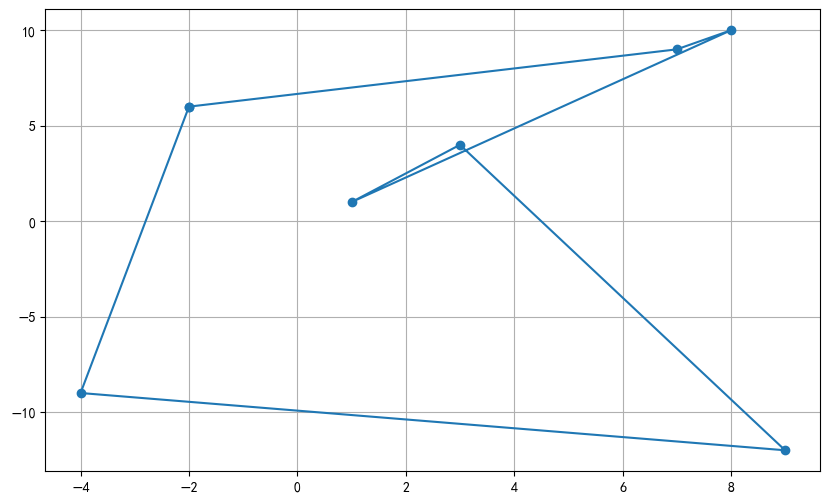

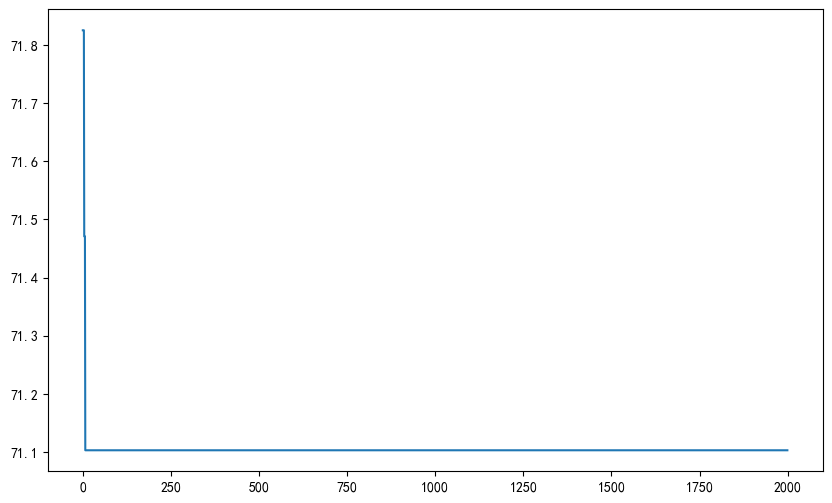

In [136]:
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO as PSO

model = PSO(
    n_particles = 2000,
    dimensions = data.shape[0],
    options = {
        'c1': 0.2,
        'c2': 0.01,
        'w': 0.9,
    },
)

def calc_distance(x: np.ndarray):
    xx = x.argsort()
    
    full_path = np.append(xx, xx[0])
    
    distance = 0
    for i in range(len(data)):
        distance += np.linalg.norm(data[full_path[i]] - data[full_path[i + 1]])
    return distance
        

cost, pos = model.optimize(
    calc_distance,
    iters = int(2e3),
    verbose = True,
)
print(f"dis: {cost}")
print(f"at: {np.argsort(pos)}")

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei,sans-serif' # 中文支持

best_path = data[np.argsort(pos)]
best_path = np.vstack([best_path, best_path[0]])
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(best_path[:, 0], best_path[:, 1], marker='o')
ax.grid(True)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(model.cost_history)
plt.show()

### 动态系数

可以让 $w$ 逐步下降，达到收敛